In [36]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os

In [41]:
# importing the dataset
data = pd.read_csv('profile.csv')

dat = ff.create_table(data.head())

py.iplot(dat)

In [44]:
#drop coulmns with nan
data.dropna(inplace=True)

In [45]:
# checking if there is any NULL data
data.isnull().any().any()

False

In [46]:
data.head()

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [47]:
data.columns

Index(['Unnamed: 0', 'gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')

In [48]:
# Rename Columns
new_data = data.rename(columns={'Unnamed: 0': 'user_id'})
new_data.head()

,user_id,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [49]:
# Change age to reflect wheighted younger age group, and remove "118" with random millenial age 20-30.
new_data['age'] = np.where(data['age'] >= 78,
                          np.random.uniform(20, 30, size=len(data)),
                          new_data['age'])

In [50]:
new_data.head(100)

,user_id,gender,age,id,became_member_on,income
1,1,F,55.0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,5,M,68.0,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,8,M,65.0,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,12,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...,...
119,119,M,57.0,0ac5ffb0f1624297a453494b845e1a91,20141104,46000.0
120,120,F,51.0,1a353048b0884fc5a0afa27677ef1e80,20170813,56000.0
123,123,F,64.0,2cf5895bddf9467e878c6d51a622d5fb,20171020,37000.0
124,124,M,71.0,6747dda08bed46298c23e05b64820a3a,20170129,57000.0


In [51]:
#drop "became member" column
df = new_data.drop(['became_member_on'], axis =1)
df.head()

,user_id,gender,age,id,income
1,1,F,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0
3,3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,5,M,68.0,e2127556f4f64592b11af22de27a7932,70000.0
8,8,M,65.0,389bc3fa690240e798340f5a15918d5c,53000.0
12,12,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


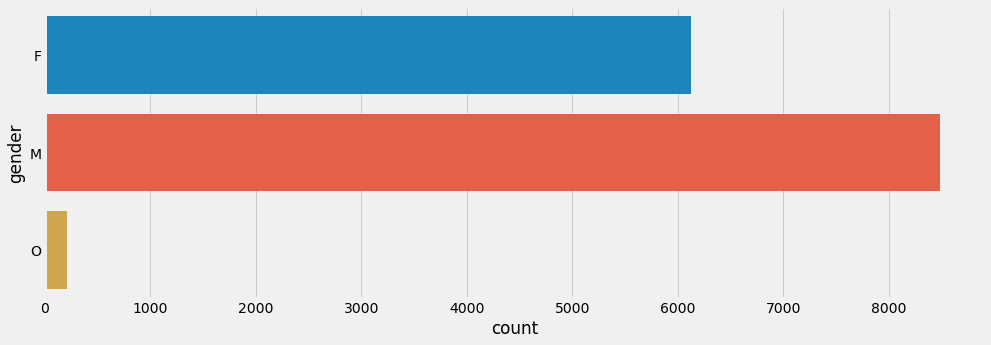

In [52]:
#plot Gender to view ratio
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'gender' , data = df)
plt.show()

In [69]:
#reorder, transform other and female to male
df['gender'].replace(
    to_replace=['M', 'O'],
    value='Female',
    inplace=True
)
df.head()

,user_id,gender,age,id,income
1,1,Male,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0
3,3,Male,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,5,Female,68.0,e2127556f4f64592b11af22de27a7932,70000.0
8,8,Female,65.0,389bc3fa690240e798340f5a15918d5c,53000.0
12,12,Female,58.0,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


In [71]:
#reorder again to create female dominant graph
df['gender'].replace(
    to_replace=['F'],
    value='Male',
    inplace=True
)
df.head()

,user_id,gender,age,id,income
1,1,Male,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0
3,3,Male,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,5,Female,68.0,e2127556f4f64592b11af22de27a7932,70000.0
8,8,Female,65.0,389bc3fa690240e798340f5a15918d5c,53000.0
12,12,Female,58.0,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


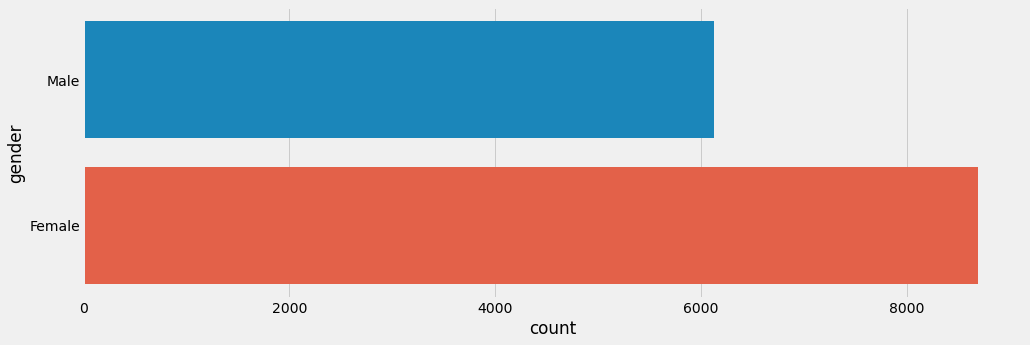

In [72]:
#check new gender graph
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'gender' , data = df)
plt.show()

In [73]:
#Save New File
output_file_path = "clean_profile.csv"
df.to_csv(output_file_path, index=False)